<a href="https://colab.research.google.com/github/PranavPutsa1006/Deep-Learning/blob/main/Speaker%20Diarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project: Speaker Diarization**

Teams Members:

1.   Priyadarshan R(BL.EN.U4CSE18094)
2.   PRK Pranav(BL.EN.U4CSE18096)
3.   Sachin Varma(BL.EN.U4CSE18106)
4.   Sahana Shenoy(BL.EN.U4CSE18107)

**Speaker Diarization**

Speaker diarization is the process of partitioning an audio stream with multiple people into homogeneous segments associated with each individual.

[Speaker Diarization using Resemblyzer](https://medium.com/saarthi-ai/who-spoke-when-build-your-own-speaker-diarization-module-from-scratch-e7d725ee279) - medium.com

[Speaker recognition](https://towardsdatascience.com/automatic-speaker-recognition-using-transfer-learning-6fab63e34e74)

[Speaker identification using Deep learning](https://medium.com/analytics-vidhya/building-a-speaker-identification-system-from-scratch-with-deep-learning-f4c4aa558a56) - medium.com

[Speaker Recognition](https://paperswithcode.com/task/speaker-verification) - articles from paperswithcode.com

https://towardsdatascience.com/speech-classification-using-neural-networks-the-basics-e5b08d6928b7

[Deep learning for audio data](https://towardsdatascience.com/getting-started-on-deep-learning-for-audio-data-667d9aa76a33) (for reference)

[Research articles](https://paperswithcode.com/task/speaker-diarization) - paperswithcode.com

Github Repos:


1.   [Smart media player](https://github.com/Speech-VINO/Smart-Media-Player)
2.   [Google's UIS-RNN model for speaker diarization](https://github.com/google/uis-rnn)
3.   [Speaker-diarization code using UIS-RNN](https://github.com/taylorlu/Speaker-Diarization)



[Google's music recognition](https://ai.googleblog.com/2018/09/googles-next-generation-music.html)
 and 
[Song dataset](http://millionsongdataset.com/)(For future development)

Sample Speaker Diarization using Resemblyzer module in python

In [ ]:
!git clone https://github.com/resemble-ai/Resemblyzer.git

Cloning into 'Resemblyzer'...
remote: Enumerating objects: 602, done.
remote: Total 602 (delta 0), reused 0 (delta 0), pack-reused 602
Receiving objects: 100% (602/602), 101.46 MiB | 47.72 MiB/s, done.
Resolving deltas: 100% (107/107), done.


In [ ]:
%cd Resemblyzer

/content/Resemblyzer


In [ ]:
!pip install webrtcvad

     |████████████████████████████████| 71kB 8.4MB/s 
  Created wheel for webrtcvad: filename=webrtcvad-2.0.10-cp37-cp37m-linux_x86_64.whl size=72357 sha256=28ab9bcbfc1ae968cec489f48033ea9a22d168ad33a2898b0e495ef2eb717a2b
  Stored in directory: /root/.cache/pip/wheels/44/2a/18/bd1aec41cac7c3051fe95d92a6ed446122ea31dc713c432fa1
Successfully built webrtcvad


In [ ]:
!pip install spectralcluster

In [ ]:
from Resemblyzer import preprocess_wav, VoiceEncoder
from pathlib import Path

#give the file path to your audio file
audio_file_path = 'meeting-clip.wav'
wav_fpath = Path(audio_file_path)

wav = preprocess_wav(wav_fpath)
encoder = VoiceEncoder("cpu")
_, cont_embeds, wav_splits = encoder.embed_utterance(wav, return_partials=True, rate=16)
print(cont_embeds.shape)

ImportError: ignored

In [ ]:
from spectralcluster import SpectralClusterer

clusterer = SpectralClusterer(
    min_clusters=2,
    max_clusters=100,
    p_percentile=0.90,
    gaussian_blur_sigma=1)

labels = clusterer.predict(cont_embeds)


NameError: ignored

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def create_labelling(labels,wav_splits):
    from resemblyzer import sampling_rate
    times = [((s.start + s.stop) / 2) / sampling_rate for s in wav_splits]
    labelling = []
    start_time = 0

    for i,time in enumerate(times):
        if i>0 and labels[i]!=labels[i-1]:
            temp = [str(labels[i-1]),start_time,time]
            labelling.append(tuple(temp))
            start_time = time
        if i==len(times)-1:
            temp = [str(labels[i]),start_time,time]
            labelling.append(tuple(temp))

    return labelling

labelling = create_labelling(labels,wav_splits)
print(labelling)

[('0', 0, 46.88), ('1', 46.88, 51.02), ('0', 51.02, 52.7), ('1', 52.7, 54.56), ('0', 54.56, 60.68), ('1', 60.68, 62.72), ('0', 62.72, 72.44)]


**Speech Detection & Segmentation**

(PD and Pranav)

In [ ]:
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
import scipy
import matplotlib.pyplot as plt
import time as t
from scipy.io.wavfile import read as wav_read
import io
try:
    import ffmpeg
except:
    !pip install ffmpeg-python
    import ffmpeg

try:
    from pydub import AudioSegment
except:
    !pip install pydub
    from pydub import AudioSegment
from pydub.silence import split_on_silence
try:
    import speech_recognition as spr
except:
    !pip install SpeechRecognition
    import speech_recognition as spr
try:
    from inaSpeechSegmenter import Segmenter
except:
    !pip install tensorflow-gpu
    !pip install inaSpeechSegmenter
    from inaSpeechSegmenter import Segmenter
from inaSpeechSegmenter.export_funcs import seg2csv, seg2textgrid
from google.colab import files
import time as t
import warnings
warnings.filterwarnings("ignore")
import IPython.display as ipd
try:
    import pyaudio
except:
    !apt install libasound2-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg
    !pip install pyaudio
    import pyaudio
import wave
import librosa
num = 0

AUDIO_HTML = """
<script>
var my_div = document.createElement("DIV");
var my_p = document.createElement("P");
var my_btn = document.createElement("BUTTON");
var t = document.createTextNode("Press to start recording");

my_btn.appendChild(t);
//my_p.appendChild(my_btn);
my_div.appendChild(my_btn);
document.body.appendChild(my_div);

var base64data = 0;
var reader;
var recorder, gumStream;
var recordButton = my_btn;

var handleSuccess = function(stream) {
  gumStream = stream;
  var options = {
    //bitsPerSecond: 8000, //chrome seems to ignore, always 48k
    mimeType : 'audio/webm;codecs=opus'
    //mimeType : 'audio/webm;codecs=pcm'
  };            
  //recorder = new MediaRecorder(stream, options);
  recorder = new MediaRecorder(stream);
  recorder.ondataavailable = function(e) {            
    var url = URL.createObjectURL(e.data);
    var preview = document.createElement('audio');
    preview.controls = true;
    preview.src = url;
    document.body.appendChild(preview);

    reader = new FileReader();
    reader.readAsDataURL(e.data); 
    reader.onloadend = function() {
      base64data = reader.result;
      //console.log("Inside FileReader:" + base64data);
    }
  };
  recorder.start();
  };

recordButton.innerText = "Recording... press to stop";

navigator.mediaDevices.getUserMedia({audio: true}).then(handleSuccess);


function toggleRecording() {
  if (recorder && recorder.state == "recording") {
      recorder.stop();
      gumStream.getAudioTracks()[0].stop();
      recordButton.innerText = "Recording Saved!!"
  }
}

// https://stackoverflow.com/a/951057
function sleep(ms) {
  return new Promise(resolve => setTimeout(resolve, ms));
}

var data = new Promise(resolve=>{
//recordButton.addEventListener("click", toggleRecording);
recordButton.onclick = ()=>{
toggleRecording()

sleep(2000).then(() => {
  // wait 2000ms for the data to be available...
  // ideally this should use something like await...
  //console.log("Inside data:" + base64data)
  resolve(base64data.toString())

});

}
});
      
</script>
"""

def get_audio():
    display(HTML(AUDIO_HTML))
    data = eval_js("data")
    binary = b64decode(data.split(',')[1])
    
    process = (ffmpeg
        .input('pipe:0')
        .output('pipe:1', format='wav')
        .run_async(pipe_stdin=True, pipe_stdout=True, pipe_stderr=True, quiet=True, overwrite_output=True)
    )
    output, err = process.communicate(input=binary)
    
    riff_chunk_size = len(output) - 8
    # Break up the chunk size into four bytes, held in b.
    q = riff_chunk_size
    b = []
    for i in range(4):
        q, r = divmod(q, 256)
        b.append(r)

    # Replace bytes 4:8 in proc.stdout with the actual size of the RIFF chunk.
    riff = output[:4] + bytes(b) + output[8:]

    sr, audio = wav_read(io.BytesIO(riff))

    return audio, sr

def transcribe(file, segmentation1):
    rs = spr.Recognizer()
    for i in range(len(segmentation1)):
        if segmentation1[i][0] == "speech":
            if segmentation1[i][1] * 1000 >= 200:
                t1 = (segmentation1[i][1] * 1000) - 200
            else:
                t1 = (segmentation1[i][1] * 1000)
            t2 = (segmentation1[i][2] * 1000) + 200
            print(t1, t2)
            newAudio = AudioSegment.from_wav(file)
            newAudio = newAudio[t1:t2]
            newAudio.export('newSong.wav', format="wav")
            with spr.AudioFile('newSong.wav') as source:
                audio_data = rs.record(source)
                text = rs.recognize_google(audio_data, language='en-IN', show_all=False)
                # print(text)
                print("Segment "+str(i)+": "+text)

if __name__ == "__main__":
    sound, sr = get_audio()
    plt.figure(figsize=(20,5))
    plt.plot(sound)
    plt.show()

    global num
    num += 1
    file = str(num) + ".wav"
    # with open(file, "wb") as files:
    #     files.write(sound.get_wav_data())
    p = pyaudio.PyAudio()
    wf = wave.open(file, 'wb')
    wf.setnchannels(1)
    wf.setsampwidth(p.get_sample_size(pyaudio.paInt16))
    wf.setframerate(44100)
    wf.writeframes(sound)
    wf.close()

    sound = AudioSegment.from_file(file, format="wav")
    sound = AudioSegment.low_pass_filter(sound,10000)
    # audio_path = './1.wav'
    # x , sr = librosa.load(audio_path)
    # ipd.Audio(audio_path)
    # rate, data = scipy.io.wavfile.read(file)
    # noisy_part = data[:]
    # reduced_noise = nr.reduce_noise(audio_clip=data, noise_clip=noisy_part, verbose=True)

    chunks = split_on_silence(
        sound,

        # split on silences longer than 1000ms (1 sec)
        min_silence_len=1000,

        # anything under -16 dBFS is considered silence
        silence_thresh=-32,

        # keep 200 ms of leading/trailing silence
        keep_silence=200
    )

    # now recombine the chunks so that the parts are at least 90 sec long
    target_length = 90 * 1000
    output_chunks = [chunks[0]]
    for chunk in chunks[1:]:
        if len(output_chunks[-1]) < target_length:
            output_chunks[-1] += chunk
        else:
            # if the last output chunk is longer than the target length,
            # we can start a new one
            output_chunks.append(chunk)

    output_chunks[0].export(file, 'wav')
    media1 = './' + file
    t.sleep(0.75)
    output_file = AudioSegment.from_file(file, format="wav")
    # output_file

    seg = Segmenter(detect_gender=False)
    segmentation1 = seg(media1)
    print(segmentation1)
    transcribe(file, segmentation1)

     |████████████████████████████████| 32.8MB 121kB/s 
     |████████████████████████████████| 394.3MB 42kB/s 
     |████████████████████████████████| 13.9MB 329kB/s 
     |████████████████████████████████| 92kB 6.2MB/s 
     |████████████████████████████████| 61kB 6.1MB/s 
     |████████████████████████████████| 81kB 7.6MB/s 
     |████████████████████████████████| 133kB 39.2MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libasound2-dev is already the newest version (1.1.3-5ubuntu0.5).
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
Suggested packages:
  portaudio19-doc
The following NEW packages will be installed:
  libportaudio2 libportaudiocpp0 portaudio19-dev
0 upgraded, 3 newly installed, 0 to remove and 31 not upgraded.
Need to get 184 kB of archives.
After this operation, 891 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudio2 amd64 19.6.0-1 [64.6 k

In [ ]:
try:
    from pydub import AudioSegment
except:
    !pip install pydub
    from pydub import AudioSegment
from pydub.silence import split_on_silence

try:
    from inaSpeechSegmenter import Segmenter
except:
    !pip install tensorflow-gpu
    !pip install inaSpeechSegmenter
    from inaSpeechSegmenter import Segmenter
from inaSpeechSegmenter.export_funcs import seg2csv, seg2textgrid
from google.colab import files
import time as t
import IPython.display as ipd

try:
    sound = AudioSegment.from_file("meeting-clip.wav", format="wav")
except:
    uploaded = files.upload()
    sound = AudioSegment.from_file("meeting-clip.wav", format="wav")

chunks = split_on_silence(
    sound,

    # split on silences longer than 1000ms (1 sec)
    min_silence_len=1000,

    # anything under -16 dBFS is considered silence
    silence_thresh=-26,

    # keep 200 ms of leading/trailing silence
    keep_silence=200
)

# now recombine the chunks so that the parts are at least 90 sec long
target_length = 90 * 1000
output_chunks = [chunks[0]]
for chunk in chunks[1:]:
    if len(output_chunks[-1]) < target_length:
        output_chunks[-1] += chunk
    else:
        # if the last output chunk is longer than the target length,
        # we can start a new one
        output_chunks.append(chunk)

output_chunks[0].export('meeting_clip.wav', 'wav')
media1 = './meeting_clip.wav'
t.sleep(0.75)
output_file = AudioSegment.from_file("meeting_clip.wav", format="wav")
# output_file

seg = Segmenter(detect_gender=False)
segmentation1 = seg(media1)
print(segmentation1)
output_file

/usr/local/lib/python3.7/dist-packages/pyannote/algorithms/utils/viterbi.py:88: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  for e, c in six.moves.zip(emission.T, consecutive)
/usr/local/lib/python3.7/dist-packages/pyannote/algorithms/utils/viterbi.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  for e, c in six.moves.zip(constraint.T, consecutive)
/usr/local/lib/python3.7/dist-packages/inaSpeechSegmenter/segmenter.py:60: RuntimeWarning: invalid value encountered in subtract
  data = (data - np.mean(data, axis=1).reshape((len(data), 1))) / np.std(data, axis=1).reshape((len(data), 1))
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:20

[('speech', 0.0, 5.0200000000000005), ('noEnergy', 5.0200000000000005, 5.48), ('speech', 5.48, 15.9), ('noEnergy', 15.9, 16.5), ('speech', 16.5, 19.66), ('noEnergy', 19.66, 20.06), ('speech', 20.06, 48.08), ('noEnergy', 48.08, 48.58), ('speech', 48.58, 50.2)]


In [ ]:
THRESHOLD = 500
CHUNK_SIZE = 1024
FORMAT = pyaudio.paInt16
RATE = 44100

def is_silent(snd_data):
    "Returns 'True' if below the 'silent' threshold"
    return max(snd_data) < THRESHOLD

def normalize(snd_data):
    "Average the volume out"
    MAXIMUM = 16384
    times = float(MAXIMUM)/max(abs(i) for i in snd_data)

    r = array('h')
    for i in snd_data:
        r.append(int(i*times))
    return r

def trim(snd_data):
    "Trim the blank spots at the start and end"
    def _trim(snd_data):
        snd_started = False
        r = array('h')

        for i in snd_data:
            if not snd_started and abs(i)>THRESHOLD:
                snd_started = True
                r.append(i)

            elif snd_started:
                r.append(i)
        return r

    # Trim to the left
    snd_data = _trim(snd_data)

    # Trim to the right
    snd_data.reverse()
    snd_data = _trim(snd_data)
    snd_data.reverse()
    return snd_data

def add_silence(snd_data, seconds):
    "Add silence to the start and end of 'snd_data' of length 'seconds' (float)"
    silence = [0] * int(seconds * RATE)
    r = array('h', silence)
    r.extend(snd_data)
    r.extend(silence)
    return r

def record():
    p = pyaudio.PyAudio()
    stream = p.open(format=FORMAT, channels=1, rate=RATE, input=True, output=True, frames_per_buffer=CHUNK_SIZE)

    num_silent = 0
    snd_started = False

    r = array('h')

    while 1:
        # little endian, signed short
        snd_data = array('h', stream.read(CHUNK_SIZE))
        if byteorder == 'big':
            snd_data.byteswap()
        r.extend(snd_data)

        silent = is_silent(snd_data)

        if silent and snd_started:
            num_silent += 1
        elif not silent and not snd_started:
            snd_started = True

        if snd_started and num_silent > 30:
            break

    sample_width = p.get_sample_size(FORMAT)
    stream.stop_stream()
    stream.close()
    p.terminate()

    r = normalize(r)
    r = trim(r)
    r = add_silence(r, 0.5)
    return sample_width, r

def record_to_file(path):
    "Records from the microphone and outputs the resulting data to 'path'"
    sample_width, data = record()
    data = pack('<' + ('h'*len(data)), *data)

    wf = wave.open(path, 'wb')
    wf.setnchannels(1)
    wf.setsampwidth(sample_width)
    wf.setframerate(RATE)
    wf.writeframes(data)
    wf.close()

if __name__ == '__main__':
    print("please speak a word into the microphone")
    record_to_file('demo.wav')
    print("done - result written to demo.wav")

In [ ]:
try:
    from logmmse import logmmse_from_file
except:
    !pip install logmmse
    from logmmse import logmmse_from_file
out = logmmse_from_file(file, output_file="denoised.wav")
print(out)

[   0    0    0 ... 1932 1834 1473]


Trasncription

In [ ]:
output_file

In [ ]:
from pydub import AudioSegment
import speech_recognition as sr
for i in range(len(segmentation1)):
    if segmentation1[i][0] == "speech":
        t1 = (segmentation1[i][1] * 1000) - 200
        t2 = (segmentation1[i][2] * 1000) + 200
        print(t1, t2)
        newAudio = AudioSegment.from_wav(file)
        newAudio = newAudio[t1:t2]
        newAudio.export('newSong.wav', format="wav")
        newAudio
        r = sr.Recognizer()
        with sr.AudioFile('newSong.wav') as source:
            audio_data = r.record(source)
            text = r.recognize_google(audio_data, language='en-IN', show_all=False)
            # print(text)
            print("Segment "+str(i)+": "+text)

-200.0 720.0


UnknownValueError: ignored

In [ ]:
from sys import byteorder
from array import array
from struct import pack
try:
    import pyaudio
except ModuleNotFoundError:
    !apt install libasound2-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg
    !pip install pyaudio
    import pyaudio
!sudo apt-get install portaudio19-dev
import wave

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libasound2-dev is already the newest version (1.1.3-5ubuntu0.5).
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
Suggested packages:
  portaudio19-doc
The following NEW packages will be installed:
  libportaudio2 libportaudiocpp0 portaudio19-dev
0 upgraded, 3 newly installed, 0 to remove and 31 not upgraded.
Need to get 184 kB of archives.
After this operation, 891 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudio2 amd64 19.6.0-1 [64.6 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudiocpp0 amd64 19.6.0-1 [15.1 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 portaudio19-dev amd64 19.6.0-1 [104 kB]
Fetched 184 kB in 1s (353 kB/s)
Selecting previously unselected package libportaudio2:amd64.
(Reading database ... 160983 files and directories currently installed.)
Preparing to 

In [ ]:
# Load the API
try:
    from inaSpeechSegmenter import Segmenter
except:
    !pip install tensorflow-gpu
    !pip install inaSpeechSegmenter
    from inaSpeechSegmenter import Segmenter
from inaSpeechSegmenter.export_funcs import seg2csv, seg2textgrid
from google.colab import files

In [ ]:
uploaded = files.upload()

In [ ]:
# select a media to analyse
# any media supported by ffmpeg may be used (video, audio, urls)
# media = './musanmix.mp3'
media1 = './meeting_clip.mp3'

In [ ]:
# create an instance of speech segmenter
# this loads neural networks and may last few seconds
# Warnings have no incidence on the results
seg = Segmenter(detect_gender=True)

In [ ]:
# segmentation is performed using the __call__ method of the segmenter instance
# segmentation = seg(media)
segmentation1 = seg(media1)

AssertionError: ignored

In [ ]:
# print(segmentation)
print(segmentation1)

[('speech', 0.0, 5.0200000000000005), ('noEnergy', 5.0200000000000005, 5.48), ('speech', 5.48, 15.9), ('noEnergy', 15.9, 16.5), ('speech', 16.5, 19.66), ('noEnergy', 19.66, 20.06), ('speech', 20.06, 48.08), ('noEnergy', 48.08, 48.58), ('speech', 48.58, 50.2)]


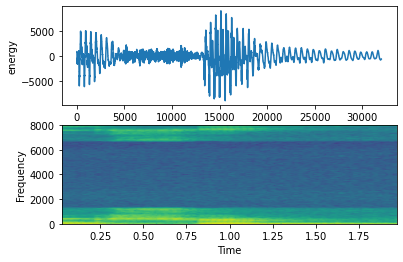

In [ ]:
import wave
import numpy as np
import matplotlib.pyplot as plt

signal_wave = wave.open('meeting-clip.wav', 'r')
sample_rate = 16000
sig = np.frombuffer(signal_wave.readframes(sample_rate), dtype=np.int16)
sig = sig[:]

plt.figure(1)

plot_a = plt.subplot(211)
plot_a.plot(sig)
plot_a.set_xlabel('sample rate * time')
plot_a.set_ylabel('energy')

plot_b = plt.subplot(212)
plot_b.specgram(sig, NFFT=1024, Fs=sample_rate, noverlap=900)
plot_b.set_xlabel('Time')
plot_b.set_ylabel('Frequency')

plt.show()

In [ ]:
# this writes the resulting segmentation into a csvfile
# the csv file may be used to import segmentation into visualization softwares,
# such as sonic-visualiser: https://www.sonicvisualiser.org
seg2csv(segmentation, 'myseg.csv')

In [ ]:
# Here is the resulting CSV
!cat myseg.csv

labels	start	stop
music	0.0	22.48
noEnergy	22.48	29.080000000000002
noise	29.080000000000002	52.800000000000004
noEnergy	52.800000000000004	54.78
noise	54.78	55.74
noEnergy	55.74	63.34
male	63.34	68.26
noEnergy	68.26	68.92
male	68.92	71.60000000000001
noEnergy	71.60000000000001	72.0
male	72.0	73.82000000000001
noEnergy	73.82000000000001	74.5


In [ ]:
# export to praat TextGrid is also supported
seg2textgrid(segmentation, 'myseg.TextGrid')

In [ ]:
!cat myseg.TextGrid

File type = "ooTextFile"
Object class = "TextGrid"

xmin = 0.000000
xmax = 74.500000
tiers? <exists> 
size = 1
item []:
	item [1]:
		class = "IntervalTier"
		name = "inaSpeechSegmenter"
		xmin = 0.000000
		xmax = 74.500000
		intervals: size = 12
		intervals[1]:
			 xmin = 0.000000
			 xmax = 22.480000
			 text = "music"
		intervals[2]:
			 xmin = 22.480000
			 xmax = 29.080000
			 text = "noEnergy"
		intervals[3]:
			 xmin = 29.080000
			 xmax = 52.800000
			 text = "noise"
		intervals[4]:
			 xmin = 52.800000
			 xmax = 54.780000
			 text = "noEnergy"
		intervals[5]:
			 xmin = 54.780000
			 xmax = 55.740000
			 text = "noise"
		intervals[6]:
			 xmin = 55.740000
			 xmax = 63.340000
			 text = "noEnergy"
		intervals[7]:
			 xmin = 63.340000
			 xmax = 68.260000
			 text = "male"
		intervals[8]:
			 xmin = 68.260000
			 xmax = 68.920000
			 text = "noEnergy"
		intervals[9]:
			 xmin = 68.920000
			 xmax = 71.600000
			 text = "male"
		intervals[10]:
			 xmin = 71.600000
			 xmax = 72.

In [ ]:
# import pyttsx3
try:
    import speech_recognition as sr
except:
    !pip install SpeechRecognition
    import speech_recognition as sr

def speech2text(audio):
    rObject = sr.Recognizer()
    text1 = rObject.recognize_google(audio, language='en')
    print("You : ", text1)
    return text1

audio = './meeting-clip.wav'
speech2text(audio)

     |████████████████████████████████| 32.8MB 91kB/s 


AssertionError: ignored

In [ ]:
sound       # Original File

In [ ]:
output_file # Modified File

In [ ]:
import librosa
audio_path = './1.wav'
x , sr = librosa.load(audio_path)

Exception ignored in: <function Wave_write.__del__ at 0x7f642ec9e4d0>
Traceback (most recent call last):
  File "/usr/lib/python3.7/wave.py", line 327, in __del__
    self.close()
  File "/usr/lib/python3.7/wave.py", line 445, in close
    self._ensure_header_written(0)
  File "/usr/lib/python3.7/wave.py", line 463, in _ensure_header_written
    raise Error('# channels not specified')
wave.Error: # channels not specified


In [ ]:
import IPython.display as ipd
ipd.Audio(audio_path)

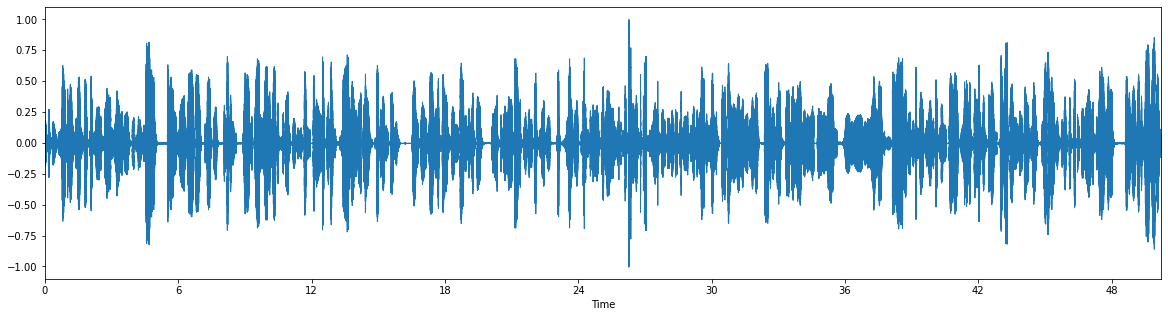

In [ ]:
%matplotlib inline
import sklearn
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(20, 5))
librosa.display.waveplot(x, sr=sr)

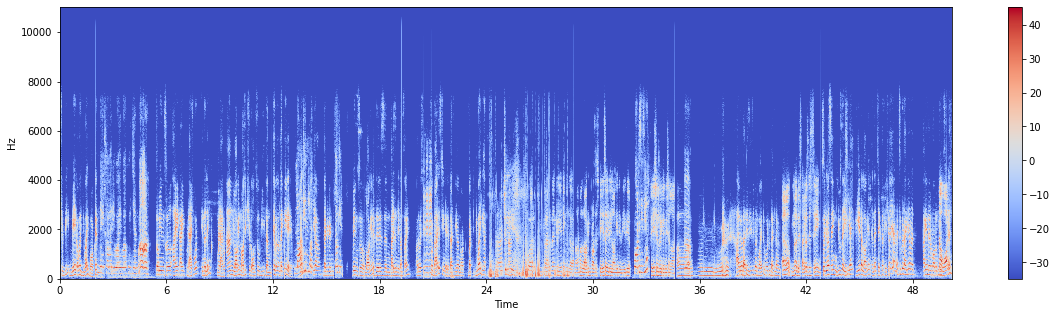

In [ ]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(20, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

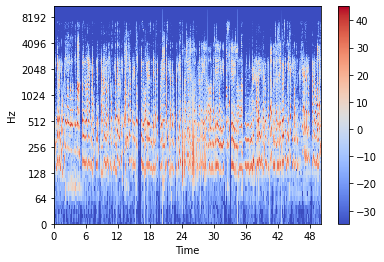

In [ ]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [ ]:
x, sr = librosa.load('./meeting_clip.wav')
ipd.Audio(x, rate=sr)

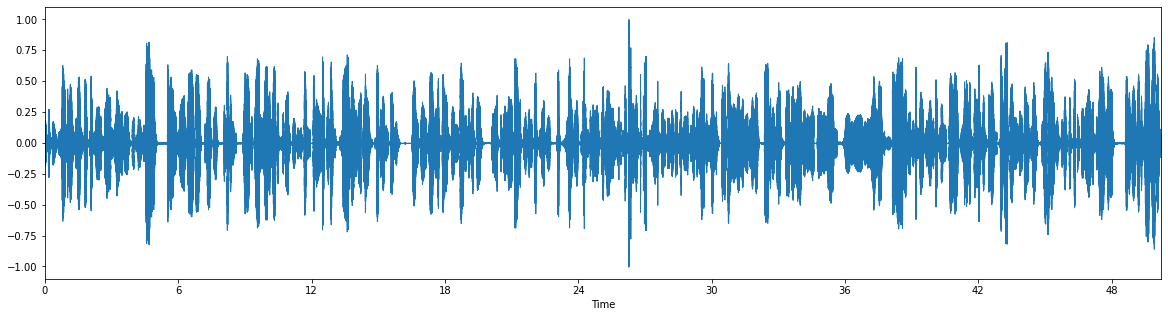

In [ ]:
plt.figure(figsize=(20, 5))
librosa.display.waveplot(x, sr=sr)

Zero Crossing rate

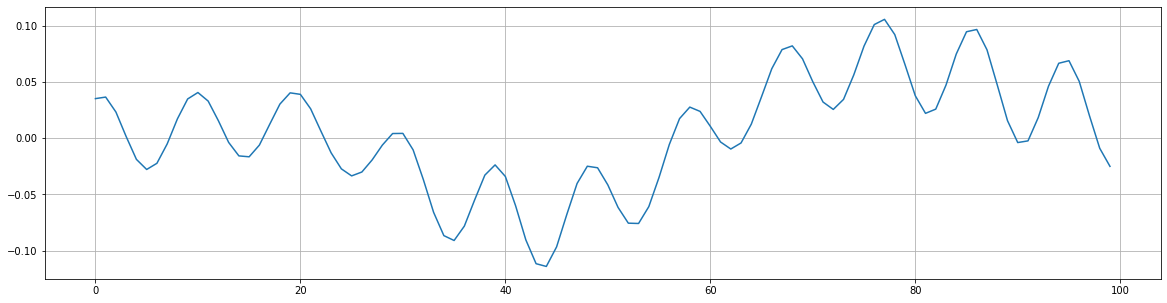

In [ ]:
n0 = 9000
n1 = 9100
plt.figure(figsize=(20, 5))
plt.plot(x[n0:n1])
plt.grid()

In [ ]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
zero_crossings.shape

(100,)

In [ ]:
print(sum(zero_crossings))

13


In [ ]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape

(2163,)

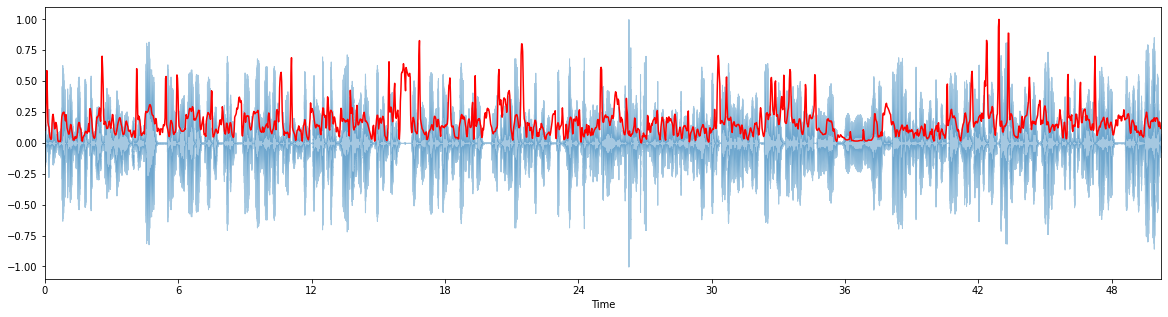

In [ ]:
# Computing the time variable for visualization
plt.figure(figsize=(20,5))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

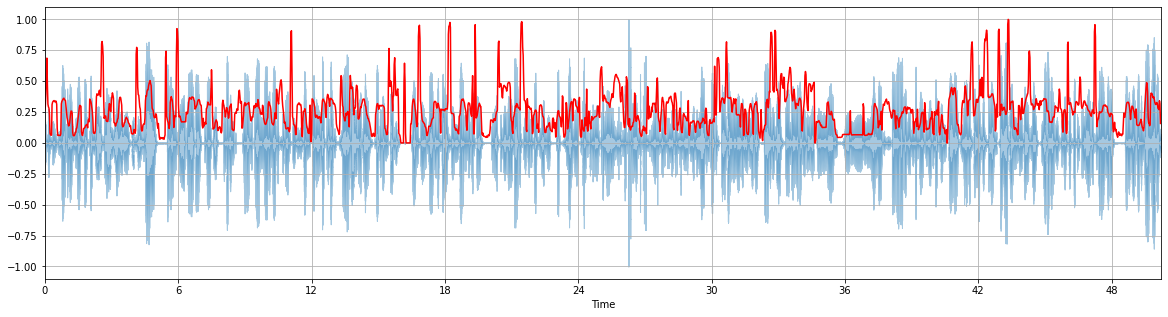

In [ ]:
plt.figure(figsize=(20,5))
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')
plt.grid()

# Embedding Extraction

Finding MFCCs

In [ ]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
print("Done")

Done


In [ ]:
audio_path = './meeting_clip.wav'

In [ ]:
signal, sr=librosa.load(audio_path)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


FileNotFoundError: ignored

In [ ]:
signal.shape

NameError: ignored

In [ ]:
mfccs = librosa.feature.mfcc(y=signal, n_mfcc=13, sr=sr)

In [ ]:
mfccs.shape

In [ ]:
mfccs

In [ ]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(mfccs, 
                         x_axis="time", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

# Sachin

In [ ]:
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
import scipy
import matplotlib.pyplot as plt
import datetime as dt
import time as t
import matplotlib.animation as animation
from scipy.io.wavfile import read as wav_read
import io
try:
    import ffmpeg
except:
    !pip install ffmpeg-python
    import ffmpeg

try:
    from pydub import AudioSegment
except:
    !pip install pydub
    from pydub import AudioSegment
from pydub.silence import split_on_silence
try:
    import speech_recognition as spr
except:
    !pip install SpeechRecognition
    import speech_recognition as spr
try:
    from inaSpeechSegmenter import Segmenter
except:
    !pip install tensorflow-gpu
    !pip install inaSpeechSegmenter
    from inaSpeechSegmenter import Segmenter
from inaSpeechSegmenter.export_funcs import seg2csv, seg2textgrid
from google.colab import files
import time as t
import warnings
warnings.filterwarnings("ignore")
import IPython.display as ipd
try:
    import pyaudio
except:
    !apt install libasound2-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg
    !pip install pyaudio
    import pyaudio
import wave
import librosa
try:
    import noisereduce as nr
except:
    !pip install noisereduce
    import noisereduce as nr
num = 0

AUDIO_HTML = """
<script>
var my_div = document.createElement("DIV");
var my_p = document.createElement("P");
var my_btn = document.createElement("BUTTON");
var t = document.createTextNode("Press to start recording");

my_btn.appendChild(t);
//my_p.appendChild(my_btn);
my_div.appendChild(my_btn);
document.body.appendChild(my_div);

var base64data = 0;
var reader;
var recorder, gumStream;
var recordButton = my_btn;

var handleSuccess = function(stream) {
  gumStream = stream;
  var options = {
    //bitsPerSecond: 8000, //chrome seems to ignore, always 48k
    mimeType : 'audio/webm;codecs=opus'
    //mimeType : 'audio/webm;codecs=pcm'
  };            
  //recorder = new MediaRecorder(stream, options);
  recorder = new MediaRecorder(stream);
  recorder.ondataavailable = function(e) {            
    var url = URL.createObjectURL(e.data);
    var preview = document.createElement('audio');
    preview.controls = true;
    preview.src = url;
    document.body.appendChild(preview);

    reader = new FileReader();
    reader.readAsDataURL(e.data); 
    reader.onloadend = function() {
      base64data = reader.result;
      //console.log("Inside FileReader:" + base64data);
    }
  };
  recorder.start();
  };

recordButton.innerText = "Recording... press to stop";

navigator.mediaDevices.getUserMedia({audio: true}).then(handleSuccess);


function toggleRecording() {
  if (recorder && recorder.state == "recording") {
      recorder.stop();
      gumStream.getAudioTracks()[0].stop();
      recordButton.innerText = "Recording Saved!!"
  }
}

// https://stackoverflow.com/a/951057
function sleep(ms) {
  return new Promise(resolve => setTimeout(resolve, ms));
}

var data = new Promise(resolve=>{
//recordButton.addEventListener("click", toggleRecording);
recordButton.onclick = ()=>{
toggleRecording()

sleep(2000).then(() => {
  // wait 2000ms for the data to be available...
  // ideally this should use something like await...
  //console.log("Inside data:" + base64data)
  resolve(base64data.toString())

});

}
});
      
</script>
"""

def get_audio():
    display(HTML(AUDIO_HTML))
    data = eval_js("data")
    binary = b64decode(data.split(',')[1])
    
    process = (ffmpeg
        .input('pipe:0')
        .output('pipe:1', format='wav')
        .run_async(pipe_stdin=True, pipe_stdout=True, pipe_stderr=True, quiet=True, overwrite_output=True)
    )
    output, err = process.communicate(input=binary)
    
    riff_chunk_size = len(output) - 8
    # Break up the chunk size into four bytes, held in b.
    q = riff_chunk_size
    b = []
    for i in range(4):
        q, r = divmod(q, 256)
        b.append(r)

    # Replace bytes 4:8 in proc.stdout with the actual size of the RIFF chunk.
    riff = output[:4] + bytes(b) + output[8:]

    sr, audio = wav_read(io.BytesIO(riff))

    return audio, sr

def transcribe(file, segmentation1):
    rs = spr.Recognizer()
    for i in range(len(segmentation1)):
        if segmentation1[i][0] == "speech":
            if segmentation1[i][1] * 1000 >= 200:
                t1 = (segmentation1[i][1] * 1000) - 200
            else:
                t1 = (segmentation1[i][1] * 1000)
            if i == len(segmentation1)-1:
                t2 = (segmentation1[i][2] * 1000) + 200
            else:
                t2 = (segmentation1[i][2] * 1000) + 200
            print(t1, t2)
            newAudio = AudioSegment.from_wav(file)
            newAudio = newAudio[t1:t2]
            newAudio.export('newSong.wav', format="wav")
            with spr.AudioFile('newSong.wav') as source:
                audio_data = rs.record(source)
                text = rs.recognize_google(audio_data, language='en-IN', show_all=False)
                # print(text)
                print("Segment "+str(i)+": "+text)

if __name__ == "__main__":
    # sound, sr = get_audio()
    # plt.figure(figsize=(20,5))
    # plt.plot(sound)
    # plt.show()

    # global num
    # num += 1
    # file = str(num) + ".wav"
    # # with open(file, "wb") as files:
    # #     files.write(sound.get_wav_data())
    # p = pyaudio.PyAudio()
    # wf = wave.open(file, 'wb')
    # wf.setnchannels(1)
    # wf.setsampwidth(p.get_sample_size(pyaudio.paInt16))
    # wf.setframerate(44100)
    # wf.writeframes(sound)
    # wf.close()

    file="meeting-clip.wav"

    sound = AudioSegment.from_file(file, format="wav")
    sound = AudioSegment.low_pass_filter(sound,10000)
    # audio_path = './1.wav'
    # x , sr = librosa.load(audio_path)
    # ipd.Audio(audio_path)
    # rate, data = scipy.io.wavfile.read(file)
    # noisy_part = data[:]
    # reduced_noise = nr.reduce_noise(audio_clip=data, noise_clip=noisy_part, verbose=True)

    chunks = split_on_silence(
        sound,

        # split on silences longer than 1000ms (1 sec)
        min_silence_len=1000,

        # anything under -16 dBFS is considered silence
        silence_thresh=-26,

        # keep 200 ms of leading/trailing silence
        keep_silence=200
    )

    # now recombine the chunks so that the parts are at least 90 sec long
    target_length = 90 * 1000
    output_chunks = [chunks[0]]
    for chunk in chunks[1:]:
        if len(output_chunks[-1]) < target_length:
            output_chunks[-1] += chunk
        else:
            # if the last output chunk is longer than the target length,
            # we can start a new one
            output_chunks.append(chunk)

    output_chunks[0].export(file, 'wav')
    media1 = './' + file
    t.sleep(0.75)
    output_file = AudioSegment.from_file(file, format="wav")
    # output_file

    seg = Segmenter(detect_gender=False)
    segmentation1 = seg(media1)
    print(segmentation1)
    transcribe(file, segmentation1)

[('speech', 0.0, 6.08), ('noEnergy', 6.08, 6.54), ('speech', 6.54, 18.06), ('noEnergy', 18.06, 18.66), ('speech', 18.66, 22.7), ('noEnergy', 22.7, 23.1), ('speech', 23.1, 53.78), ('noEnergy', 53.78, 54.28), ('speech', 54.28, 55.9)]
0.0 6280.0
Segment 0: you should beat me call you right back with that
6340.0 18260.0
Segment 2: so means I type dashboard in the link on login magic should also be done by.
18460.0 22900.0
Segment 4: login better than that is in database come inside
22900.0 53980.0
Segment 6: how do I say so.
54080.0 56100.0
Segment 8: DragonVale problems
